<a href="https://colab.research.google.com/github/anderl23/Diabetes-Prediction-using-Maching-Learning-methods---Random-Forrest-and-AutoML---Louise-Anderson/blob/main/ca4015_LouiseAnderson_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction using Maching Learning methods - Random Forrest and AutoML - Louise Anderson

## Introduction and Context 
The dataset examined in this notebook originates from the National Institute of Diabetes and Digestive and Kidney Diseases. The patients represented by this dataset are all females of Pima Indian heritage who are at least 21 years of age.
The dataset includes the following eight medical predictor variables:
  - Pregnancies (Number of times the patient has been pregnant)
  - Glucose (Patient's plasma glucose concentration at 2 hours in an oral glucose tolerance test)
  - BloodPressure (Patient's diastolic blood pressure (mm Hg))
  - SkinThickness (Patient's triceps skin fold thickness (mm))
  - Insulin (Patient's 2-Hour serum insulin level (mu U/ml))
  - BMI (Patient's body mass index (weight in kg/(height in m)^2))
  - DiabetesPedigreeFunction (Patient's likelihood of having diabetes based on family history)
  - Age (Age of patient in years)

The dataset also includes a class variable 'Outcome' of which Outcome=1 indicates that the patient has been diagnosed with diabetes and Outcome=0 indicates that the patient has not. 

In the original paper the ADAP learning algorithm is used to forecast the onset of diabetes [1].

Here two different machine learning modelling aproaches - Random Forrest and AutoML - are executed in an attempt to accurately predict whether or not the patients in the dataset have diabetes. Both methods are then critically evaluated.

## Pre-requesites and imports

In [ ]:
pip install --pre pycaret # uncomment to install pycaret

In [ ]:
pip install cuml # install cuml (soft dependency for pycaret)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn import metrics
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *

## Load and clean data

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All variables are of integer or float data types and are all non-null values. However null values may have been replaced with 0 and distributions should be examined to determine whether 0 values should be replaced with variables mean/median [2].

## EDA and visualization

In [25]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [14]:
fig = px.histogram(df, x="Pregnancies", color="Outcome")
fig.show()

In [15]:
fig = px.histogram(df, x="Glucose", color="Outcome")
fig.show()

In [16]:
fig = px.histogram(df, x="BloodPressure", color="Outcome")
fig.show()

In [17]:
fig = px.histogram(df, x="SkinThickness", color="Outcome")
fig.show()

In [18]:
fig = px.histogram(df, x="Insulin", color="Outcome")
fig.show()

In [19]:
fig = px.histogram(df, x="BMI", color="Outcome")
fig.show()

In [20]:
fig = px.histogram(df, x="DiabetesPedigreeFunction", color="Outcome")
fig.show()

## Method 1 - Random Forrest Classifier

In [ ]:
# Assign features and target features
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
             'DiabetesPedigreeFunction', 'Age']]
y=df['Outcome']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [ ]:
# create classifier
clf=RandomForestClassifier(n_estimators=100)

# train model and execute prediction
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
# Measure the accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7532467532467533


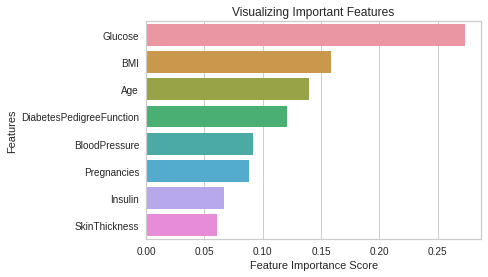

In [ ]:
# Visualize feature importance
feature_imp = pd.Series(clf.feature_importances_,index=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
             'DiabetesPedigreeFunction', 'Age']).sort_values(ascending=False)

%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Method 2 - AutoML using PyCaret

In [ ]:
clf1 = setup(data = df, target = 'Outcome')

INFO:logs:PyCaret ClassificationExperiment
INFO:logs:Logging name: clf-default-name
INFO:logs:ML Usecase: MLUsecase.CLASSIFICATION
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: 3251
INFO:logs:self.variable_keys: {'X_test', 'data', 'master_model_container', 'fold_generator', 'pipeline', 'exp_id', 'y_train', 'fix_imbalance', '_all_models', 'USI', '_is_multiclass', 'gpu_param', '_available_plots', 'log_plots_param', 'display_container', 'fold_groups_param', 'idx', 'exp_name_log', 'html_param', 'logging_param', 'y', '_ml_usecase', '_all_models_internal', 'fold_shuffle_param', 'memory', 'target_param', 'X_train', 'n_jobs_param', 'y_test', 'seed', '_gpu_n_jobs_param', 'X', '_all_metrics', 'variable_keys'}
INFO:logs:Checking environment
INFO:logs:python_version: 3.7.14
INFO:logs:python_build: ('default', 'Sep  8 2022 00:06:44')
INFO:logs:machine: x86_64
INFO:logs:platform: Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic
INFO:logs:Memory: svmem(total=1361636147

,Description,Value
0,Session id,2344
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


INFO:logs:Soft dependency imported: xgboost: 0.90
'catboost' is a soft dependency and not included in the pycaret installation. Please run: `pip install catboost` to install.
Alternately, you can install this by running `pip install pycaret[models]`
INFO:logs:Soft dependency imported: xgboost: 0.90
'catboost' is a soft dependency and not included in the pycaret installation. Please run: `pip install catboost` to install.
Alternately, you can install this by running `pip install pycaret[models]`
INFO:logs:setup() successfully completed in 2.28s...............


In [ ]:
best = compare_models()

INFO:logs:Initializing compare_models()
INFO:logs:compare_models(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7fc4d2643c10>, include=None, fold=None, round=4, cross_validation=True, sort=Accuracy, n_select=1, budget_time=None, turbo=True, errors=ignore, fit_kwargs=None, groups=None, experiment_custom_tags=None, probability_threshold=None, verbose=True, parallel=None, caller_params={'self': <pycaret.classification.oop.ClassificationExperiment object at 0x7fc4d2643c10>, 'include': None, 'exclude': None, 'fold': None, 'round': 4, 'cross_validation': True, 'sort': 'Accuracy', 'n_select': 1, 'budget_time': None, 'turbo': True, 'errors': 'ignore', 'fit_kwargs': None, 'groups': None, 'experiment_custom_tags': None, 'probability_threshold': None, 'engines': None, 'verbose': True, 'parallel': None, '__class__': <class 'pycaret.classification.oop.ClassificationExperiment'>}, exclude=None)
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7877,0.8436,0.6096,0.7512,0.6633,0.5124,0.5244,0.2740
rf,Random Forest Classifier,0.7876,0.8437,0.6257,0.7388,0.6673,0.5148,0.5253,0.3110
lightgbm,Light Gradient Boosting Machine,0.7765,0.8228,0.6523,0.6969,0.6708,0.5024,0.5056,0.1470
lr,Logistic Regression,0.7726,0.8418,0.6041,0.7099,0.6468,0.4819,0.4892,0.5880
lda,Linear Discriminant Analysis,0.7670,0.8397,0.5982,0.6983,0.6392,0.4697,0.4762,0.0420
gbc,Gradient Boosting Classifier,0.7653,0.8255,0.6409,0.6780,0.6549,0.4779,0.4817,0.1450
ridge,Ridge Classifier,0.7651,0.0000,0.5877,0.7012,0.6337,0.4638,0.4716,0.0330
ada,Ada Boost Classifier,0.7578,0.8052,0.5772,0.6844,0.6217,0.4463,0.4531,0.1270
qda,Quadratic Discriminant Analysis,0.7503,0.8138,0.5722,0.6633,0.6084,0.4292,0.4347,0.0400
nb,Naive Bayes,0.7502,0.8113,0.6146,0.6585,0.6331,0.4447,0.4474,0.0410


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

INFO:logs:Initializing Logistic Regression
INFO:logs:Total runtime is 3.7550926208496094e-05 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7fc4d2643c10>, estimator=lr, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=True, metrics=None, display=<pycaret.internal.display.display.CommonDisplay object at 0x7fc4c4ecaf50>, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Logistic Regression Imported successfully

INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=2344, verbose=0, warm_start=False)
INFO:logs:compare_models() successfully completed......................................


In [ ]:
best = compare_models(sort = 'F1')

INFO:logs:Initializing compare_models()
INFO:logs:compare_models(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7fc4d2643c10>, include=None, fold=None, round=4, cross_validation=True, sort=F1, n_select=1, budget_time=None, turbo=True, errors=ignore, fit_kwargs=None, groups=None, experiment_custom_tags=None, probability_threshold=None, verbose=True, parallel=None, caller_params={'self': <pycaret.classification.oop.ClassificationExperiment object at 0x7fc4d2643c10>, 'include': None, 'exclude': None, 'fold': None, 'round': 4, 'cross_validation': True, 'sort': 'F1', 'n_select': 1, 'budget_time': None, 'turbo': True, 'errors': 'ignore', 'fit_kwargs': None, 'groups': None, 'experiment_custom_tags': None, 'probability_threshold': None, 'engines': None, 'verbose': True, 'parallel': None, '__class__': <class 'pycaret.classification.oop.ClassificationExperiment'>}, exclude=None)
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7765,0.8228,0.6523,0.6969,0.6708,0.5024,0.5056,0.0750
rf,Random Forest Classifier,0.7876,0.8437,0.6257,0.7388,0.6673,0.5148,0.5253,0.3250
et,Extra Trees Classifier,0.7877,0.8436,0.6096,0.7512,0.6633,0.5124,0.5244,0.2710
gbc,Gradient Boosting Classifier,0.7653,0.8255,0.6409,0.6780,0.6549,0.4779,0.4817,0.1500
lr,Logistic Regression,0.7726,0.8418,0.6041,0.7099,0.6468,0.4819,0.4892,0.0840
lda,Linear Discriminant Analysis,0.7670,0.8397,0.5982,0.6983,0.6392,0.4697,0.4762,0.0420
ridge,Ridge Classifier,0.7651,0.0000,0.5877,0.7012,0.6337,0.4638,0.4716,0.0330
nb,Naive Bayes,0.7502,0.8113,0.6146,0.6585,0.6331,0.4447,0.4474,0.0430
ada,Ada Boost Classifier,0.7578,0.8052,0.5772,0.6844,0.6217,0.4463,0.4531,0.1230
qda,Quadratic Discriminant Analysis,0.7503,0.8138,0.5722,0.6633,0.6084,0.4292,0.4347,0.0400


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

INFO:logs:Initializing Logistic Regression
INFO:logs:Total runtime is 5.543629328409831e-05 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7fc4d2643c10>, estimator=lr, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=True, metrics=None, display=<pycaret.internal.display.display.CommonDisplay object at 0x7fc4c4ecaa50>, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Logistic Regression Imported successfully


INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2344, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() successfully completed......................................


In [ ]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2344, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
lgbm = create_model('lightgbm')

INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7fc4d2643c10>, estimator=lightgbm, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, metrics=None, display=None, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8704,0.8992,0.7895,0.8333,0.8108,0.7123,0.7129
1,0.7778,0.7880,0.5789,0.7333,0.6471,0.4882,0.4954
2,0.7963,0.7579,0.6316,0.7500,0.6857,0.5367,0.5410
3,0.7593,0.8391,0.5789,0.6875,0.6286,0.4524,0.4561
4,0.7778,0.8256,0.6842,0.6842,0.6842,0.5128,0.5128
5,0.8148,0.8556,0.6316,0.8000,0.7059,0.5735,0.5820
6,0.6852,0.8150,0.6842,0.5417,0.6047,0.3489,0.3555
7,0.7170,0.8016,0.5556,0.5882,0.5714,0.3604,0.3607
8,0.7925,0.8302,0.7222,0.6842,0.7027,0.5435,0.5439


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported successfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model


INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 30
INFO:logs:display_container: 5
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2344, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() successfully completed......................................


In [ ]:
models()

INFO:logs:gpu_param set to False
INFO:logs:Soft dependency imported: xgboost: 0.90
'catboost' is a soft dependency and not included in the pycaret installation. Please run: `pip install catboost` to install.
Alternately, you can install this by running `pip install pycaret[models]`
INFO:logs:Soft dependency imported: xgboost: 0.90
'catboost' is a soft dependency and not included in the pycaret installation. Please run: `pip install catboost` to install.
Alternately, you can install this by running `pip install pycaret[models]`


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True
